# AllLifeBank Customer Segmentation

## Description

### Context:

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help

### Objective: 
To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

### Dataset:  ALLLife bank


### Data Description: 
Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

Apply the concepts and techniques you have learned in the previous weeks and summarize your insights at the end.


# Importing the Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
#numerical libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore
#import panda to work with dataframe columns and rows
import pandas as pd
#import plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn for statistical plots
import seaborn as sns
from sklearn.metrics import silhouette_score


In [2]:
#Loading dataset
xls = pd.ExcelFile("Credit Card Customer Data.xlsx")

In [3]:
print(xls.sheet_names)# printing the excel sheet names

['Sheet1']


In [4]:
cccd = pd.read_excel(xls, 'Sheet1') # getting the data from the sheet

In [5]:
# copying data to another varaible to avoid any changes to original data
df=cccd.copy()

## Displaying the first 5 and last 5 rows in the dataset

In [6]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [7]:
df.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


## Viewing the shape of data

In [8]:
df.shape  #check dataframe rows & columns

(660, 7)

This shows that there are 660 rows and 7 columns.


## Checking the data types and columns of the dataset

In [9]:
df.info()  #check data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [11]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [12]:
df.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

All the features have integer values based on the above output

In [10]:
df.isnull().sum()  #check for missing values

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

This shows that there are no missing values in this dataset

df.nunique() #checking if there is any unique values

In [14]:
df[df.duplicated(['Customer Key'], keep=False)] #checking if there is any duplicated values

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,5,47437,100000,6,0,12,3
48,49,37252,6000,4,0,2,8
104,105,97935,17000,2,1,2,10
332,333,47437,17000,7,3,1,0
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2
411,412,50706,44000,4,5,0,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


Looks like there is there some duplication in the customer key however no rows are duplicated 

Now we are going to delete SI_No and Customer because there is redundancy in those columns

In [15]:
df.drop(['Sl_No', 'Customer Key'],  axis=1, inplace=True)

In [16]:
df.info

<bound method DataFrame.info of      Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0              100000                   2                  1   
1               50000                   3                  0   
2               50000                   7                  1   
3               30000                   5                  1   
4              100000                   6                  0   
..                ...                 ...                ...   
655             99000                  10                  1   
656             84000                  10                  1   
657            145000                   8                  1   
658            172000                  10                  1   
659            167000                   9                  0   

     Total_visits_online  Total_calls_made  
0                      1                 0  
1                     10                 9  
2                      3                 4  
3                  

## Multivarite Analysis

<AxesSubplot:>

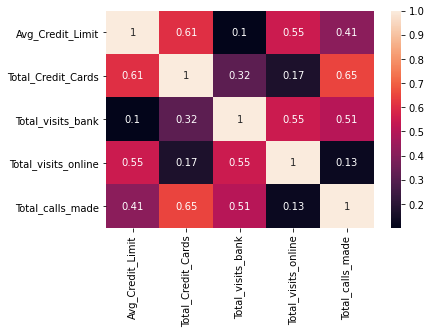

In [19]:
#check correlation matrix
cor = abs(df.corr())
sns.heatmap(cor, annot=True)

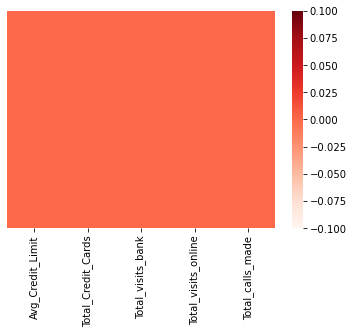

In [24]:
# Heatmap to visualize missing values in the data
sns.heatmap(df.isnull(), cmap='Reds', yticklabels=False)
plt.show()

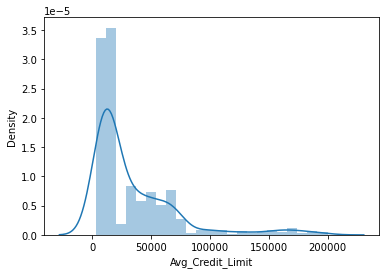

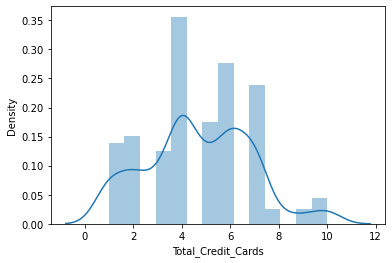

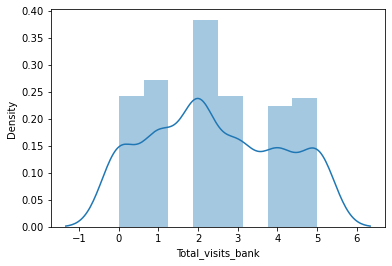

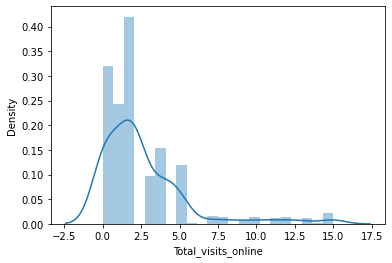

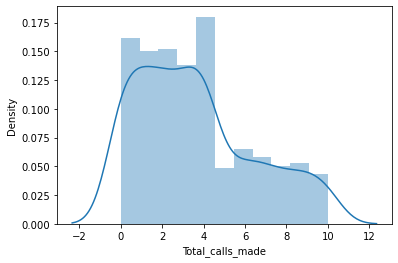

In [26]:
for i in df.columns:
    sns.distplot (df[i], kde = True)
    plt.show();


### Pairplot 

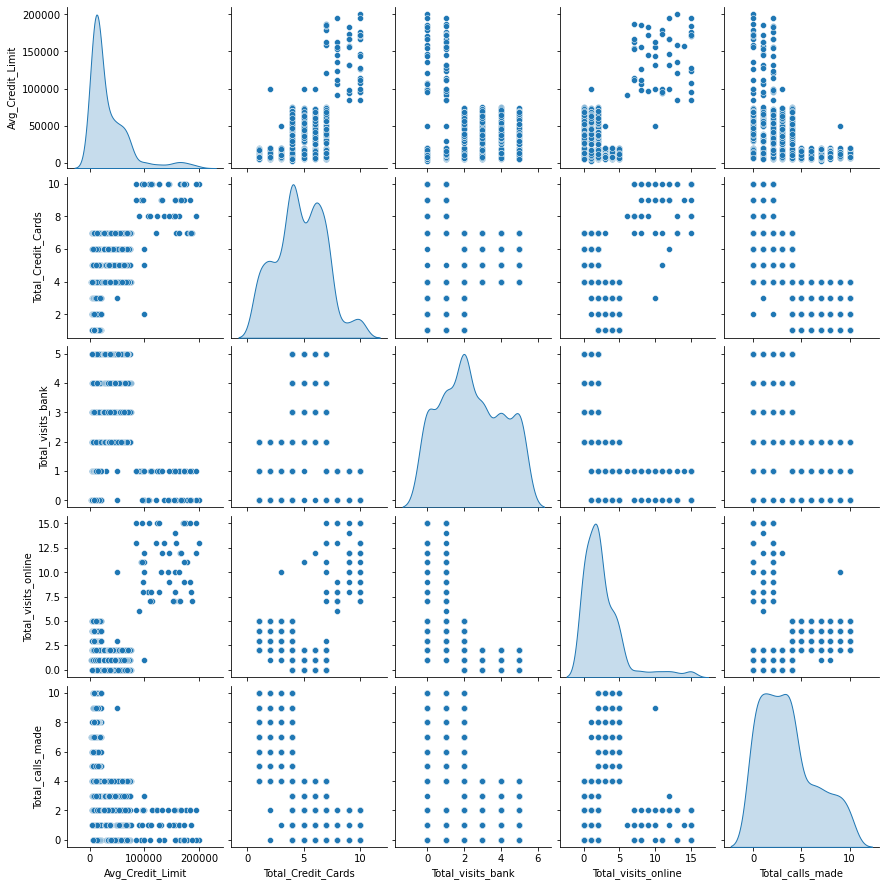

In [28]:
sns.pairplot(df, diag_kind='kde');

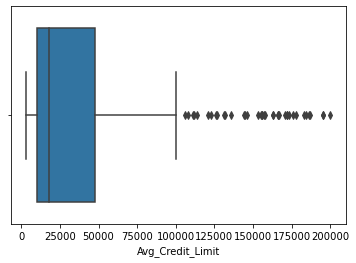

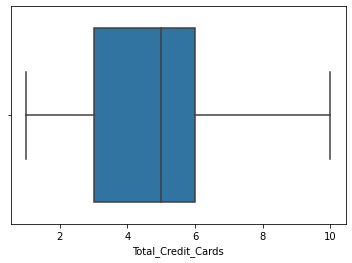

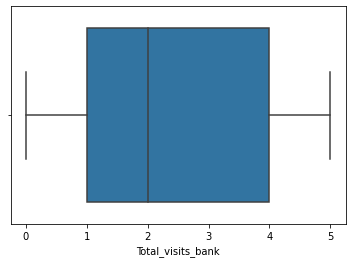

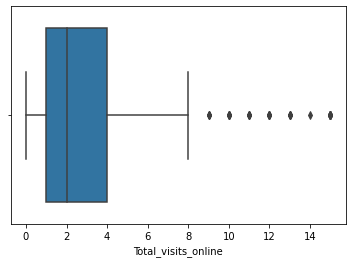

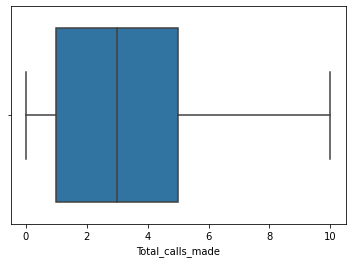

In [31]:
for feature in list(df.columns):
    sns.boxplot(x=df[feature])
    plt.show()
   

## Observations From the Multivariate Analysis and Outlier Detection

- The kde plots display the frequency of peak values of each feature.
- The peak in each of the kde plots displays the mode and how approximately the guessed number of distinct clusters any specific feature forms.
- It also shows that Avg_Credit_Limit shows 3 while Total_Credit_Cards shows 4, Total_visits_bank sows 3 Total_visits_online shows 3 and Total_call_made shows 2 peaks which indicates minimum number of probable separate clusters.
- There is no significant correlation observed among the different features
- It shows that there is no strong linear relationship between any of the features/variable
- Avg credit limit, total visits online and total calls made are positively skewed
- Total credit cards and total visits to the bank are more normalized.
- The diagonal of the pairplot we can assume the data to be a mixture of gaussians , looing at the peaks of the gaussians we can say that the optimal number might come between 2-3


## Scaling

In [32]:
from scipy.stats import zscore
dfScaled=df.apply(zscore)
dfsk = dfScaled.copy()
dfsk.head()

#scaling the data

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


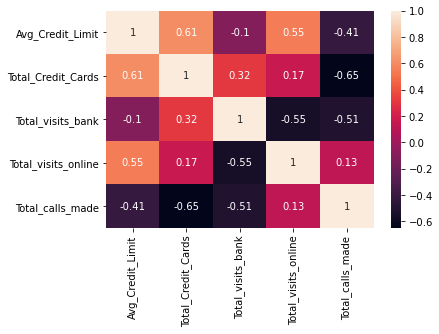

In [33]:
sns.heatmap(dfsk.corr(),annot=True)
plt.show()
# HeatMap : To check for correlated features

## Elbow Method and K-means clustering

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

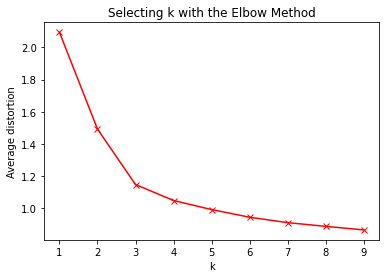

In [38]:
#Finding optimal no. of clusters
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(dfScaled)
    prediction=model.predict(dfScaled)
    meanDistortions.append(sum(np.min(cdist(dfScaled, model.cluster_centers_, 'euclidean'), axis=1)) / dfScaled.shape[0])


plt.plot(clusters, meanDistortions, 'rx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

- This elbow graph shows that the bend above 3 or 4 clusters looks like a perfect value.
- This indicates most optimum number of clusters for this data is 3.
- Now we can take K=3 , so let's apply Kmeans with k=3
- Here we shall be using 3 clusters

In [37]:
final_model=KMeans(3)
final_model.fit(dfsk)
prediction=final_model.predict(dfsk)
prediction_using_3 = prediction

#Append the prediction 
df["GROUP"] = prediction
dfScaled["GROUP"] = prediction
print("Groups Assigned : \n")
df.head()

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,2
1,50000,3,0,10,9,1
2,50000,7,1,3,4,2
3,30000,5,1,1,4,2
4,100000,6,0,12,3,0


In [41]:
dfKmeansClust = df.groupby(['GROUP'])
dfKmeansClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,141040.000000,8.740000,0.600000,10.900000,1.080000
1,12174.107143,2.410714,0.933036,3.553571,6.870536
2,33782.383420,5.515544,3.489637,0.981865,2.000000


In [42]:
#setting the value of k=3
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)
kmeans.fit(dfsk)

KMeans(n_clusters=3, n_init=15, random_state=2345)

In [43]:
#calculate centroids and generate their values
centroids = kmeans.cluster_centers_
centroids

array([[-0.59579625, -1.05962278, -0.9015185 ,  0.32299678,  1.14810882],
       [-0.02106178,  0.37368962,  0.6663945 , -0.55367163, -0.55300488],
       [ 2.83176409,  1.86222621, -1.10576269,  2.82731942, -0.87432983]])

In [45]:
#create centroid dataframe and print
CentroidDF = pd.DataFrame(centroids, columns = list(dfsk))
CentroidDF  #these are the centroids for all clusters

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,-0.595796,-1.059623,-0.901518,0.322997,1.148109
1,-0.021062,0.373690,0.666395,-0.553672,-0.553005
2,2.831764,1.862226,-1.105763,2.827319,-0.874330


The above are the centroids for the different clusters


#### Adding Label to the dataset

In [132]:
## create a new data frame for label and convert to categorical variable

KMeansData = dfScaled[:]  #creating a copy of the data 

KMeansData['KmeansLabel']=kmeans.labels_

In [47]:
KMeansData.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP,KmeansLabel
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,2,1
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,1,0
2,0.410293,1.058973,-0.860451,0.134290,0.145528,2,1
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,2,1
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,0,2


In [48]:
KMeansData['KmeansLabel'].value_counts()  #this will help to find the number of data points in each group/cluster

1    386
0    224
2     50
Name: KmeansLabel, dtype: int64

In [49]:
#create model with k=3
FinalModel = KMeans(3)
FinalModel.fit(KMeansData)
prediction = FinalModel.predict(KMeansData)

#append  prediction
KMeansData['Group'] = prediction
print("Groups Assigned: \n")
KMeansData[["Avg_Credit_Limit", "Group"]]

Groups Assigned: 



,Avg_Credit_Limit,Group
0,1.740187,2
1,0.410293,0
2,0.410293,2
3,-0.121665,2
4,1.740187,1
...,...,...
655,1.713589,1
656,1.314621,1
657,2.937092,1
658,3.655235,1


array([[<AxesSubplot:title={'center':'Avg_Credit_Limit'}, xlabel='[Group]'>,
        <AxesSubplot:title={'center':'GROUP'}, xlabel='[Group]'>,
        <AxesSubplot:title={'center':'KmeansLabel'}, xlabel='[Group]'>,
        <AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[Group]'>],
       [<AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[Group]'>,
        <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[Group]'>,
        <AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[Group]'>,
        <AxesSubplot:>]], dtype=object)

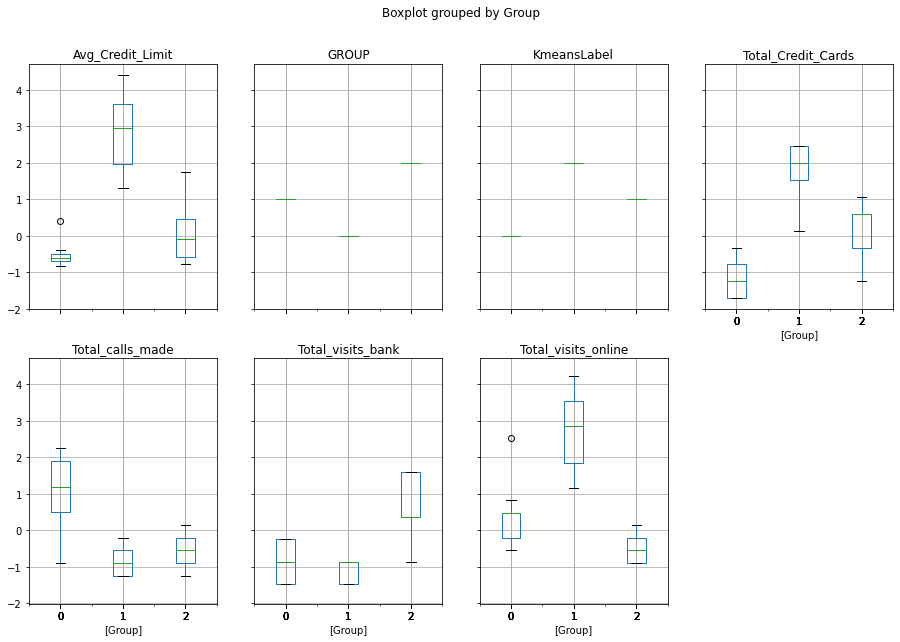

In [50]:
KMeansData.boxplot(by='Group', layout=(2, 4),
                   figsize=(15, 10))  #boxplot of all clusters

### Observations
- The customers that have an average cresit limit that is less than 100,000 are rarely online also visit the bank less often
- While customers who have an average credit limit that is above 100,000 are mostly always online and visit the bank more often


In [51]:
#now this will be to determine if there is a relationship between x and y (example)
KMeansData['Total_visits_bank'].corr(
    KMeansData['Total_visits_online'])  # this says no for these two variables

-0.5518614016610989

### Observation 
- This reveals that in order to have a balanced transposed relationship between total visits to the bank and total visits online, the groups that conduct business in the bank are unlikely to visit the bank onlne or virtually.


## Silhouette Score for K-means

In [52]:
# Calculate & Print Silhoutte Score for KMeans

score = silhouette_score(KMeansData, FinalModel.labels_, metric='euclidean')

print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.618


In [53]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=3,
                                affinity='euclidean',
                                linkage='average')
model.fit(dfScaled)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [54]:
#from scipy.cluster.hierarchy import dendrogram, linkage, cophenet and pdist from scipy
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

Z = linkage(dfScaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z, pdist(dfScaled))
c

0.9168725782090766

This reveals that there is a good cophenet index score

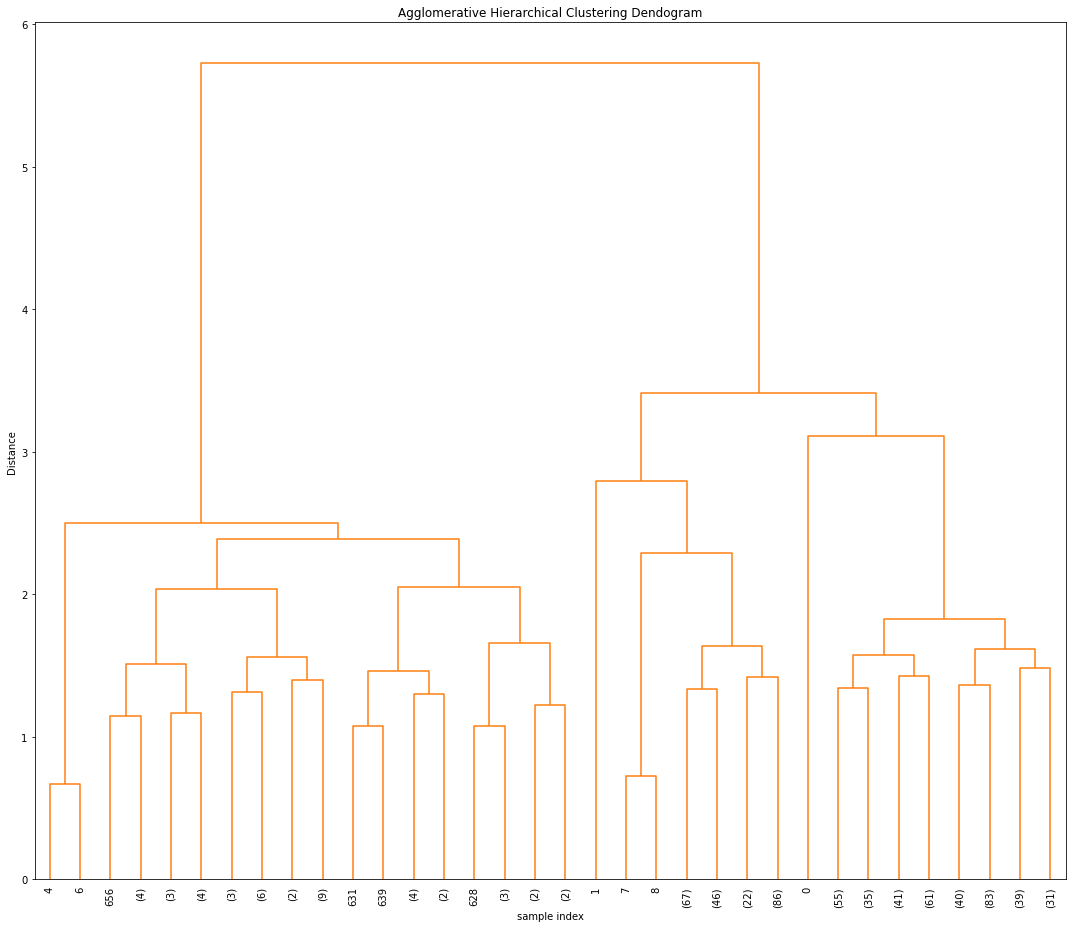

In [55]:
plt.figure(figsize=(15, 13))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,
           leaf_rotation=90,
           p=5,
           color_threshold=40,
           leaf_font_size=10,
           truncate_mode='level')
plt.tight_layout()

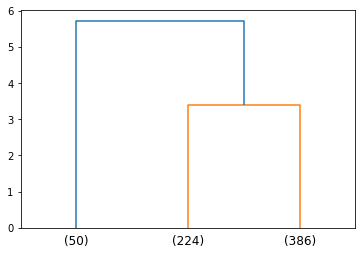

In [56]:
#find optimal distance
dendrogram(
    Z,
    truncate_mode='lastp',  #show only last p clusters
    p=3,  #show only the last p merged clusters    
)
plt.show()

#we have the same size clusters with both kmeans and hierarchical methods

#### Plotting different dendograms for different linkage methods and choosing the best based on cophenetic coeff

In [81]:
Z_single = linkage(dfsk, metric='euclidean', method='single')
c_single, coph_dists_single = cophenet(Z_single , pdist(dfsk))
c_single

0.8981791108157512

In [82]:
Z_ward = linkage(dfsk, metric='euclidean', method='ward')
c_ward, coph_dists_ward = cophenet(Z_ward , pdist(dfsk))
c_ward

0.7566252666432097

In [83]:
Z_complete = linkage(dfsk, metric='euclidean', method='complete')
c_complete, coph_dists_complete = cophenet(Z_complete , pdist(dfsk))
c_complete

0.884420725860894

In [84]:
Z_weighted = linkage(dfsk, metric='euclidean', method='weighted')
c_weighted, coph_dists_weighted = cophenet(Z_weighted , pdist(dfsk))
c_weighted

0.9069999252384202

In [85]:
Z_avg = linkage(dfsk, metric='euclidean', method='average')
c_avg, coph_dists_avg = cophenet(Z_avg , pdist(dfsk))
c_avg

0.9102691112621796

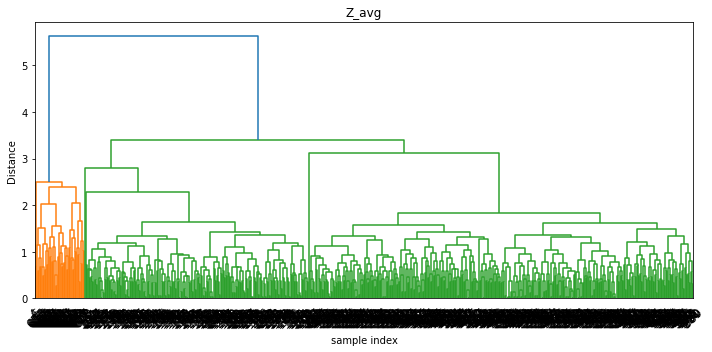

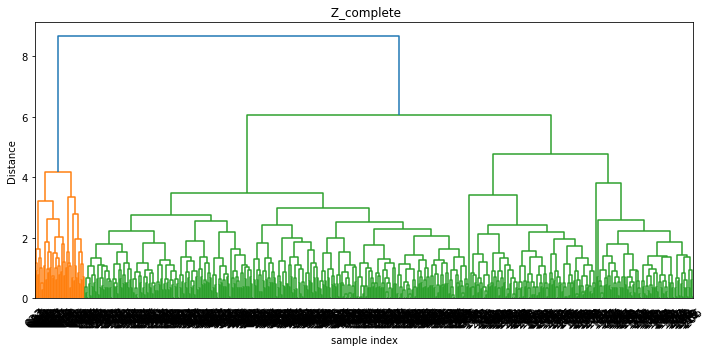

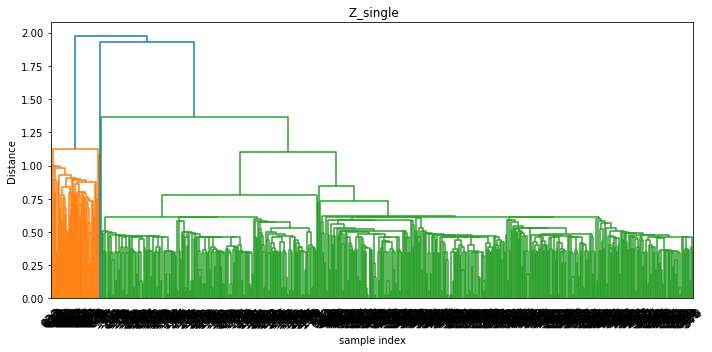

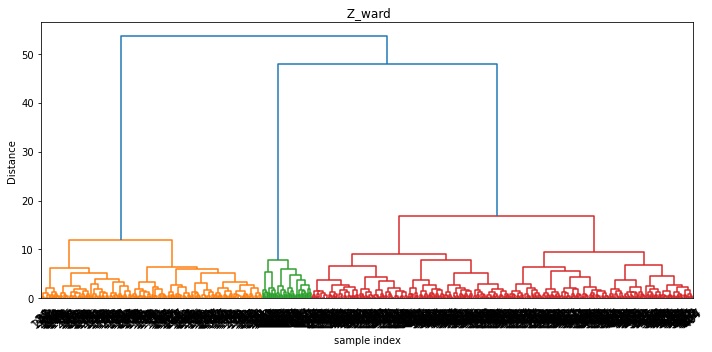

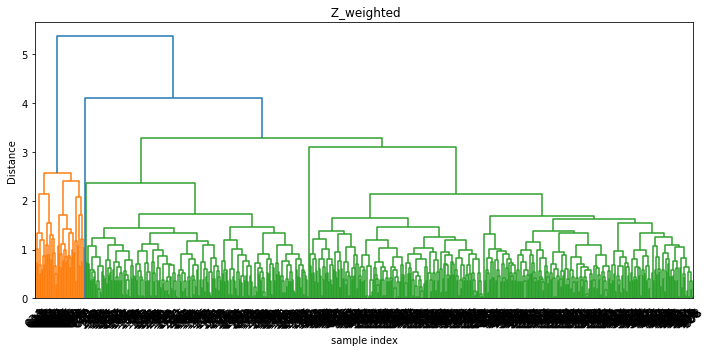

In [86]:
temp = ['Z_avg',' Z_complete',' Z_single',' Z_ward',' Z_weighted']
j=0
for i in [Z_avg, Z_complete, Z_single, Z_ward, Z_weighted]:
    
    plt.figure(figsize=(10, 5))
    plt.title(temp[j])
    j=j+1
    plt.xlabel('sample index')
    plt.ylabel('Distance')
    dendrogram(i,  leaf_rotation=45 , leaf_font_size=12 )
    plt.tight_layout()

#### Observation
- The dendograms shows similar 3 big clusters except when linkage is single
- Average linkage method seems to give the highest cophenetic correlation of 0.9
- This reaveals its the most reliable to the data

In [72]:
# Let us try with K = 3 (to demonstrate the 3d plot using mplot3d)
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of KMeans Clustering')

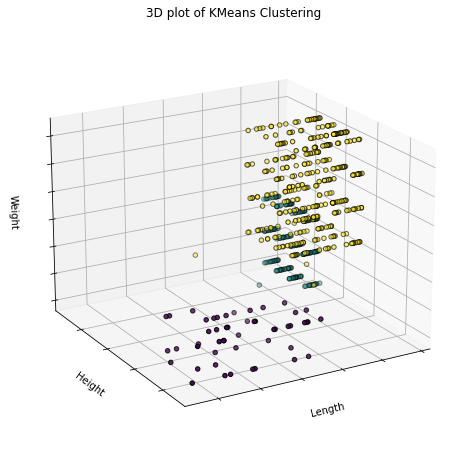

In [71]:
## 3D plots of clusters

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
k3_model=KMeans(3)
k3_model.fit(dfsk)
labels = k3_model.labels_
ax.scatter(dfsk.iloc[:, 0], dfsk.iloc[:, 1], dfsk.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

Text(0.5, 0.92, '3D plot of KMeans Clustering')

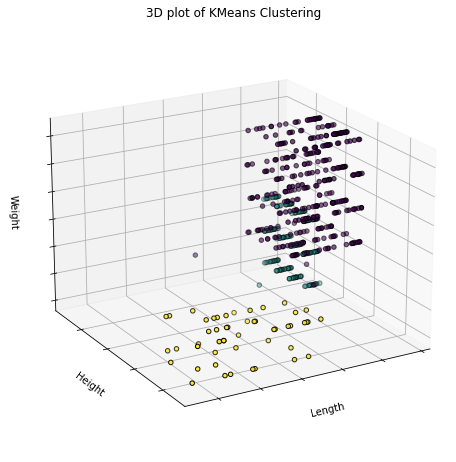

In [67]:
## 3D plots of clusters

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
k3_model=KMeans(3)
k3_model.fit(dfsk)
labels = k3_model.labels_
ax.scatter(dfsk.iloc[:, 0], dfsk.iloc[:, 1], dfsk.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

In [68]:
# Check the number of data in each cluster

labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[224 386  50]


In [70]:
# Distribution looks fine.

# let us check the centers in each group
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(dfsk) )
centroid_df.transpose()

,0,1,2
Avg_Credit_Limit,-0.595796,-0.021062,2.831764
Total_Credit_Cards,-1.059623,0.373690,1.862226
Total_visits_bank,-0.901518,0.666395,-1.105763
Total_visits_online,0.322997,-0.553672,2.827319
Total_calls_made,1.148109,-0.553005,-0.874330


In [75]:
# Add cluster number to original credit_card data

predictions = kmeans.predict(dfsk)
predictions
df["group"] = predictions
df['group'] = df['group'].astype('category')
df.dtypes

Avg_Credit_Limit          int64
Total_Credit_Cards        int64
Total_visits_bank         int64
Total_visits_online       int64
Total_calls_made          int64
GROUP                     int32
group                  category
dtype: object

In [87]:
hierarchy = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
hierarchy_fit = hierarchy.fit(dfsk)

In [90]:
dfsk['labels_hierarchy'] = hierarchy_fit.labels_
dfsk['labels_hierarchy'] = hierarchy_fit.labels_
dfsk['labels_hierarchy'] = hierarchy_fit.labels_ 
dfsk.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,group,labels_hierarchy
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,1,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,0,2
2,0.410293,1.058973,-0.860451,0.134290,0.145528,1,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,1,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2,1


array([[<AxesSubplot:title={'center':'Avg_Credit_Limit'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[group]'>],
       [<AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[group]'>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

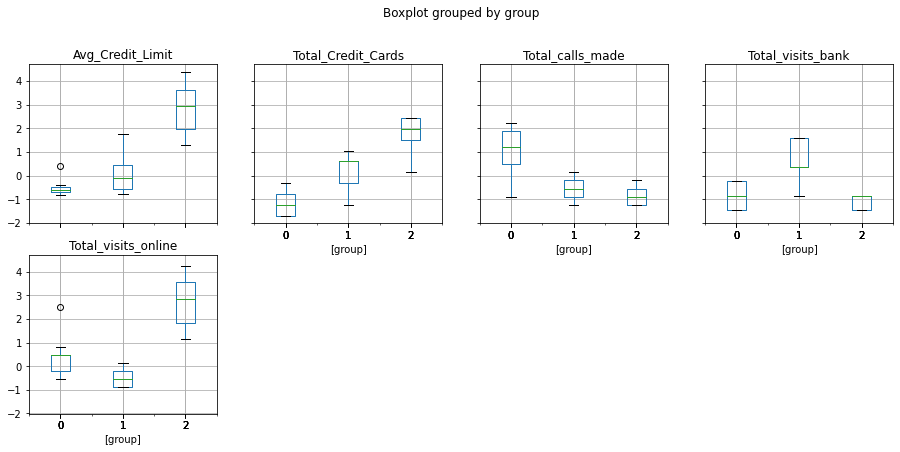

In [76]:
#now we are going to visualize the centers

dfsk["group"] = predictions
dfsk.boxplot(by = 'group',  layout=(3,4), figsize=(15, 10))

In [96]:
from sklearn.metrics import silhouette_score
print ('The Silhouette Score for Heirarchy method is: ', silhouette_score(dfsk, hierarchy_fit.labels_))

The Silhouette Score for Heirarchy method is:  0.6047553572064851


- The avg. score is greater than 0.5, which means the clustering is good.
- The score for both K-means and Heirarchy are almost the same suggesting both algorithms are equally good for the given data
- 

## Silhouette plot on K-Means clustering

In [97]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

In [98]:
X = dfsk.to_numpy()
X.shape

(660, 7)

For n_clusters = 2 The average silhouette_score is : 0.5140347596040015
For n_clusters = 3 The average silhouette_score is : 0.6047553572064851
For n_clusters = 4 The average silhouette_score is : 0.3952531823360013
For n_clusters = 5 The average silhouette_score is : 0.27715710072781724
For n_clusters = 6 The average silhouette_score is : 0.2594264083062904


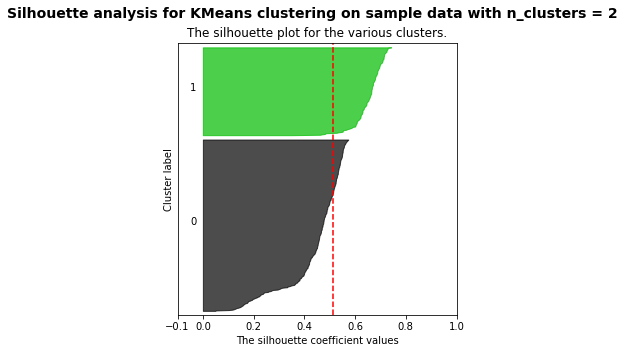

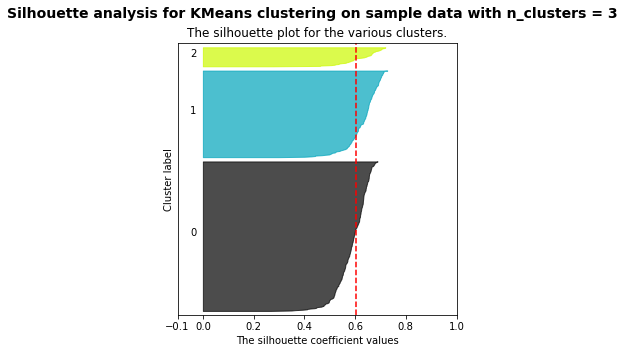

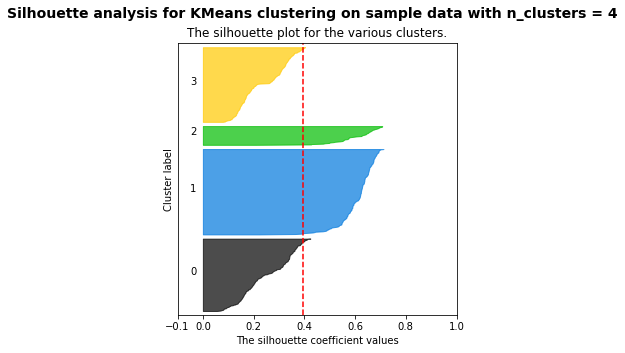

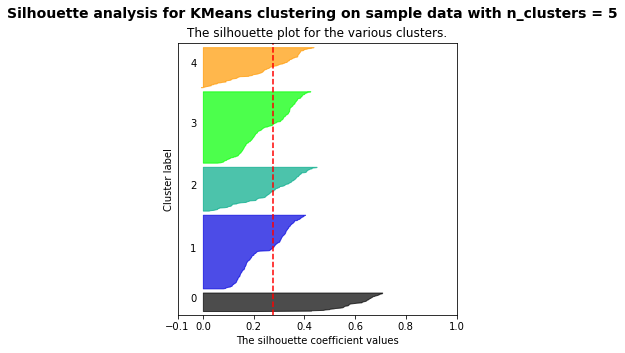

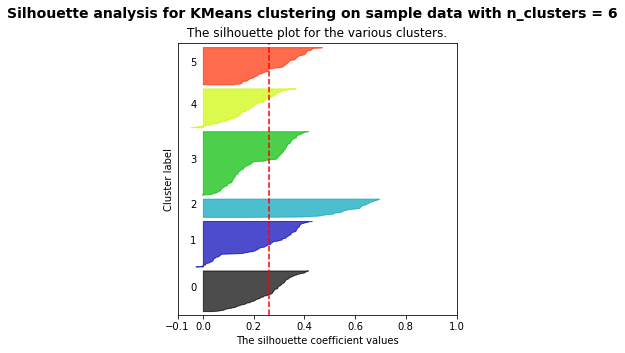

In [99]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(5, 5)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
  
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### Observations
- The silhouette score is maximum when the total number of clusters is 3
- The score decreases when the clusters increase or decrease indicating that 3 is the optimum number
- Some samples are having negative silhouette score when number of clusters = 2,5,6 signifying it is being assigned in a wrong cluster.

## Hierarchical Clustering

Hierarchical clustering with different dendograms for the same dataset and choosing the best using the cophenetic coefficient by using different types of linkages

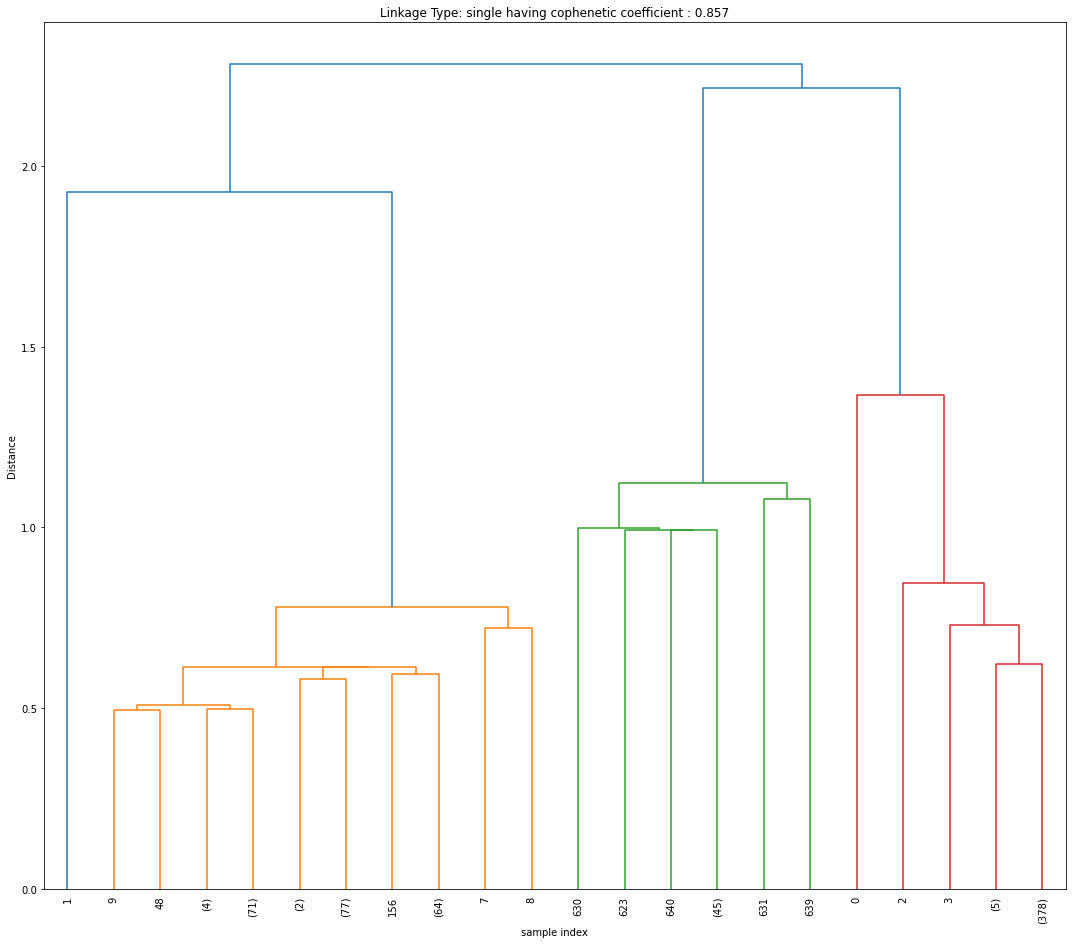

single 0.8570957708532765


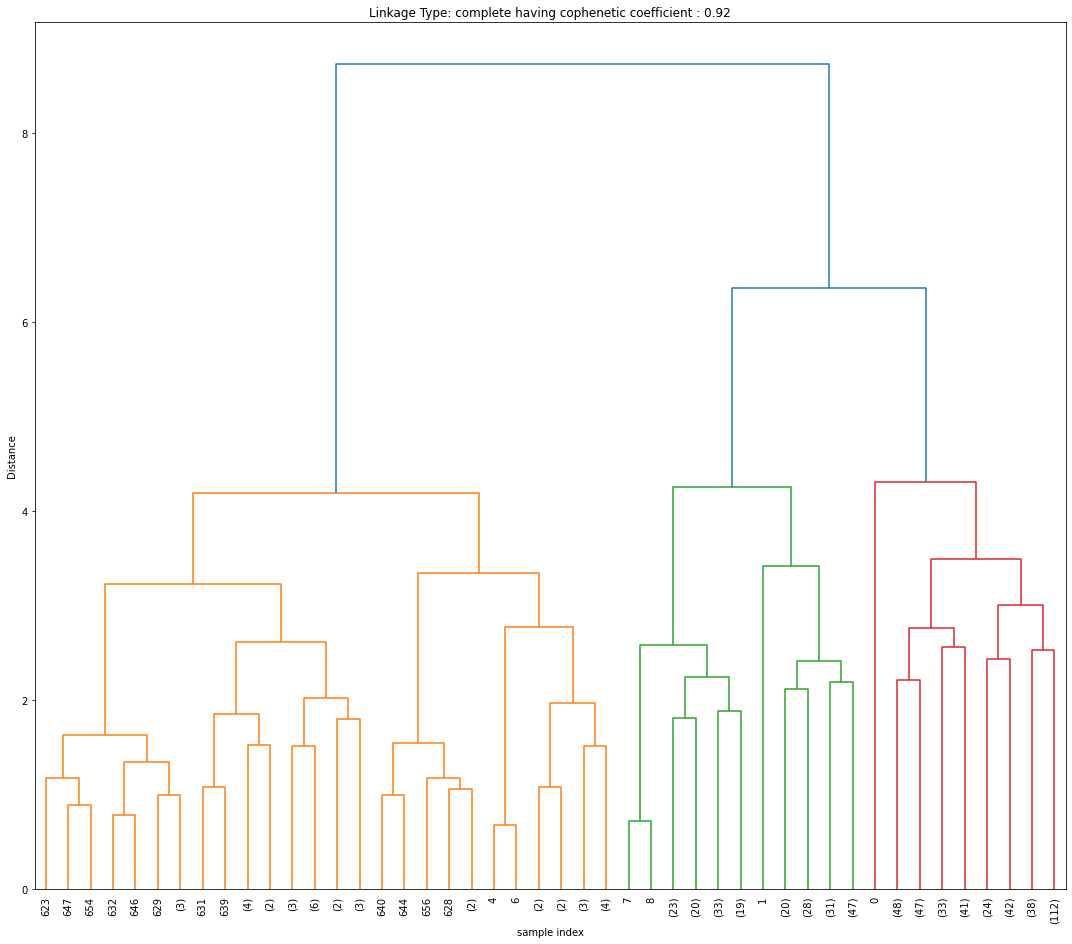

complete 0.9200216505568093


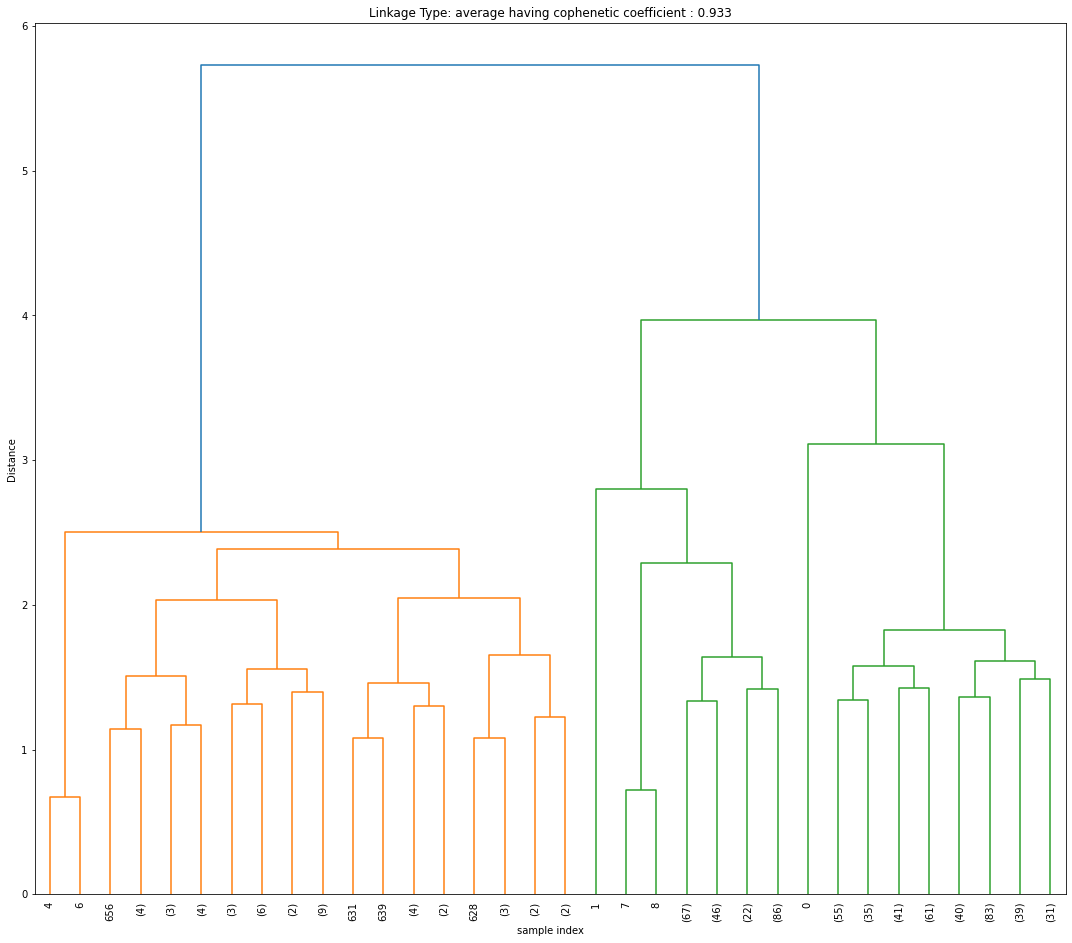

average 0.9326509851302


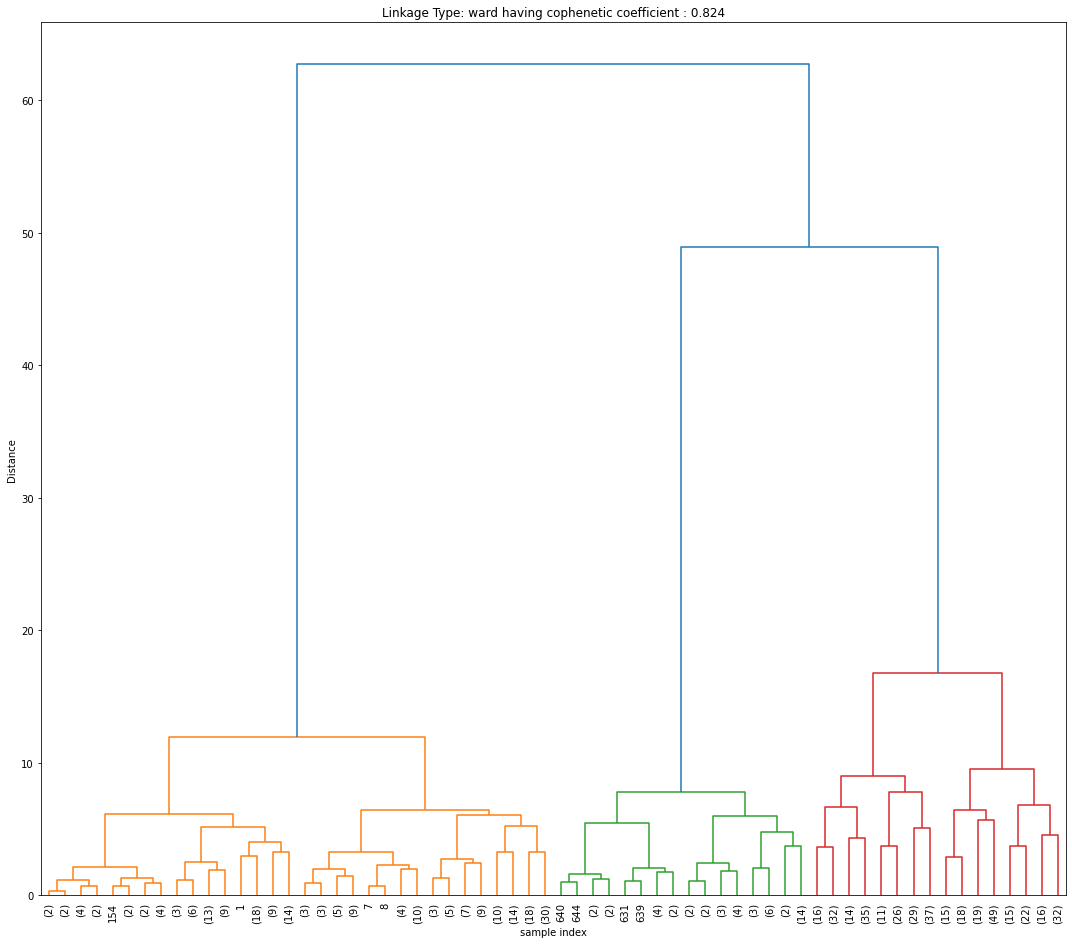

ward 0.8237257149884929


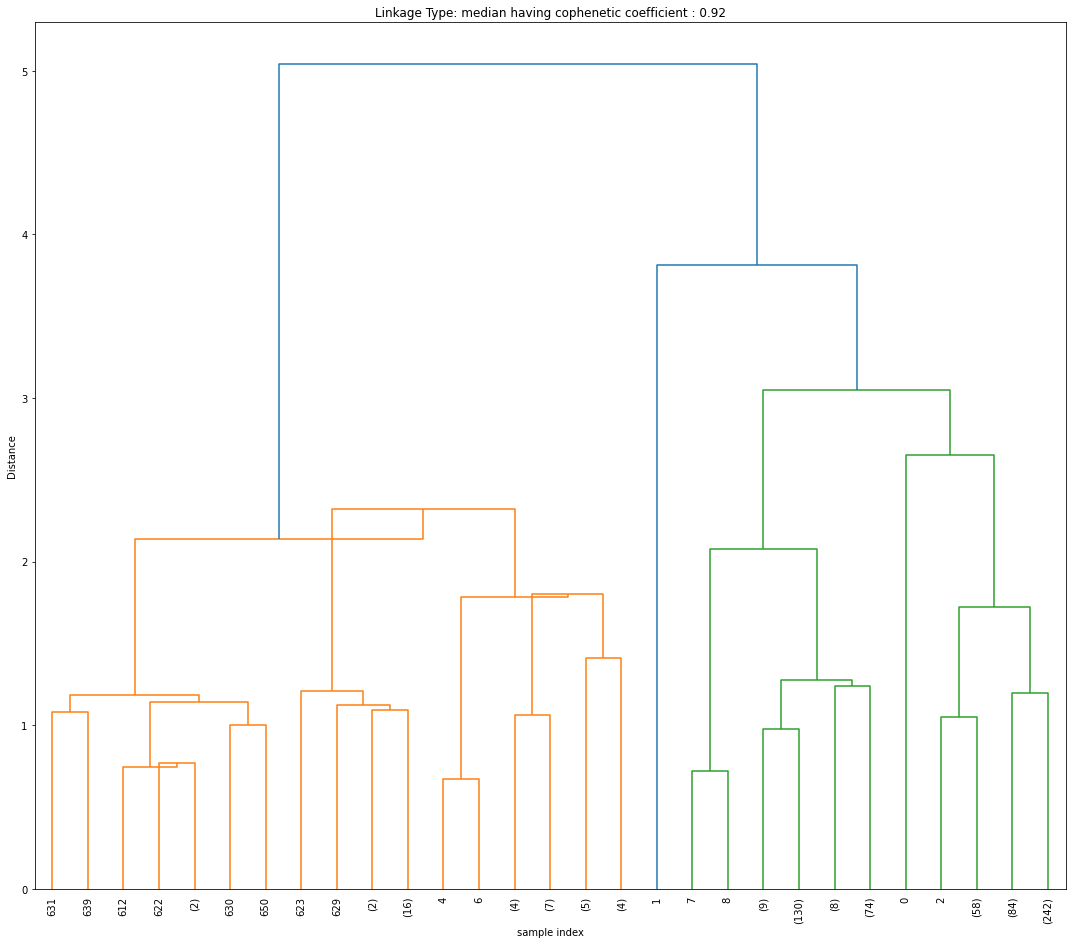

median 0.9203623818313699


In [113]:
linkage_methods=['single','complete','average','ward','median']
results_cophenetic_coef=[]
for i in linkage_methods :
    plt.figure(figsize=(15, 13))
    plt.xlabel('sample index')
    plt.ylabel('Distance')
    Z = linkage(dfsk, i)
    cc,cophn_dist=cophenet(Z,pdist(dfsk))
    dendrogram(Z,leaf_rotation=90.0,p=5,leaf_font_size=10,truncate_mode='level')
    plt.tight_layout()
    plt.title("Linkage Type: "+ i +" having cophenetic coefficient : "+str(round(cc,3)) )
    plt.show()
    results_cophenetic_coef.append((i,cc))
    print (i,cc)

In [114]:
results_cophenetic_coef_df=pd.DataFrame(results_cophenetic_coef,columns=['LinkageMethod','CopheneticCoefficient'])
results_cophenetic_coef_df

,LinkageMethod,CopheneticCoefficient
0,single,0.857096
1,complete,0.920022
2,average,0.932651
3,ward,0.823726
4,median,0.920362


## Observations 
- This shows that the best cophenetic coefficient we get is for "Average" linkage.
- Looking at dendogram 'ward' and 'complete' show good difference between clusters.
- Choosing 'complete' because it has high cophenetic coefficirnt and good cluster segregation.


We will bow a dendogram for the last 25 formed clusters using complete linkage to have a better view since the above dendograms are very populated

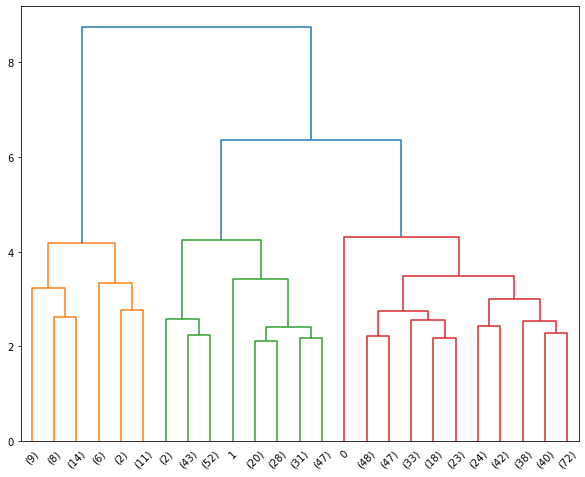

In [116]:
#use truncate_mode='lastp' to select last p formed clusters
plt.figure(figsize=(10,8))
Z = linkage(dfsk, 'complete', metric='euclidean')

dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=25 # show only the last p merged clusters
)
plt.show()

This takes a maximum distance around 5 to form the different clusters as clearly visible it cuts the tallest vertical lines.

In [122]:
max_d=5
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')

In [123]:
set(clusters)  # So there are 3 clusters which are formed

{1, 2, 3}

## Assign the clusters label to the data set

In [124]:
dataset2=dfsk[:] #Create a duplicate of the dataset

In [125]:
dataset2['HierarchicalClusteringLabel']=clusters

In [126]:
dataset2.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,group,labels_hierarchy,HierarchicalClusteringLabel
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,1,0,3
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,0,2,2
2,0.410293,1.058973,-0.860451,0.134290,0.145528,1,0,3
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,1,0,3
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2,1,1


## Analyse the clusters

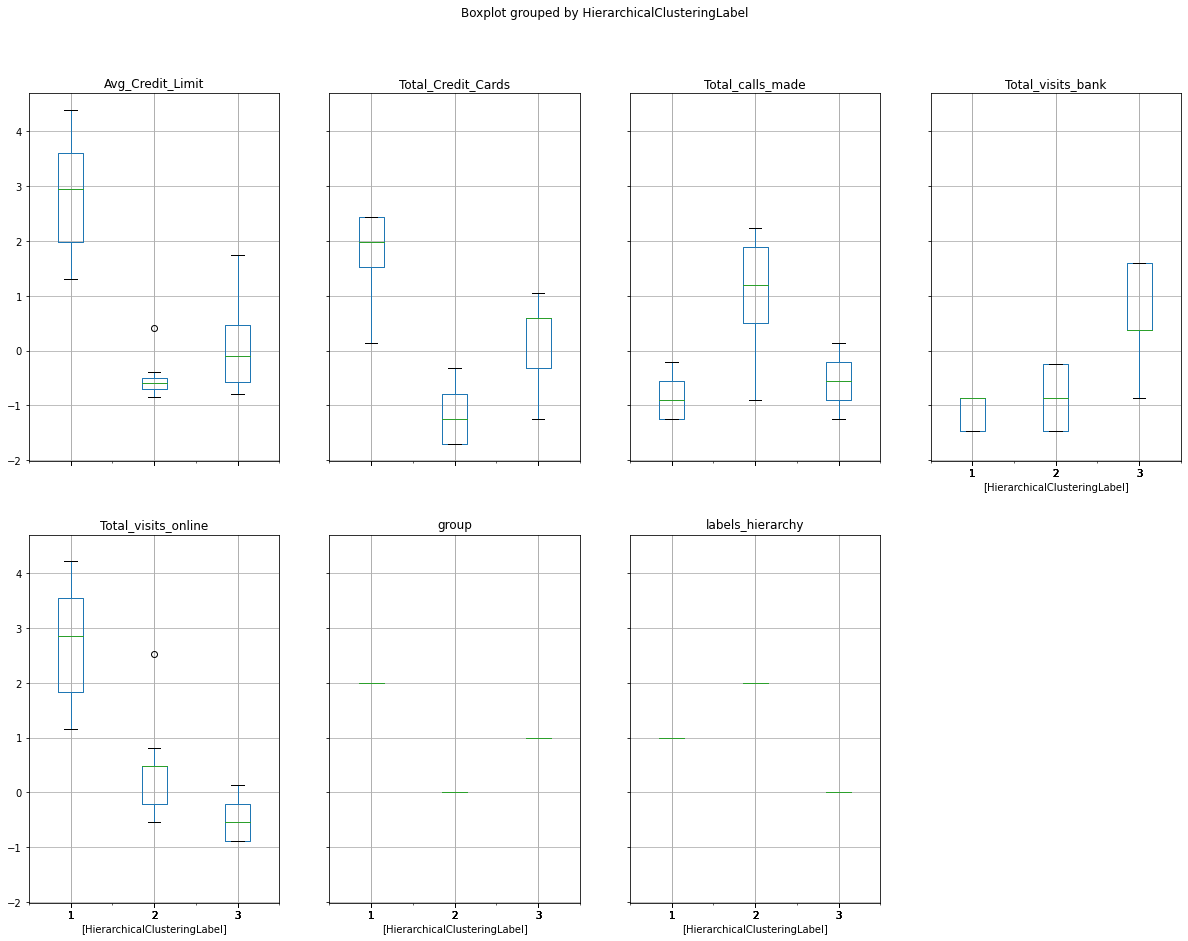

In [127]:
dataset2.boxplot(by = 'HierarchicalClusteringLabel',  layout=(2,4), figsize=(20, 15))
plt.show()

## Comparison between K-means and Hierarchical clustering

In [139]:
# Calculate & Print Silhoutte Score for KMeans

score = silhouette_score(KMeansData, FinalModel.labels_, metric='euclidean')

print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.561


In [141]:
Kmeans_results=KMeansData.groupby('KmeansLabel').mean()
Kmeans_results

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
KmeansLabel,,,,,,
0,-0.595796,-1.059623,-0.901518,0.322997,1.148109,1
1,-0.021062,0.373690,0.666395,-0.553672,-0.553005,2
2,2.831764,1.862226,-1.105763,2.827319,-0.874330,0


In [138]:
Hierarchical_results=dataset2.groupby('HierarchicalClusteringLabel').mean()
Hierarchical_results

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,group,labels_hierarchy
HierarchicalClusteringLabel,,,,,,,
1,2.831764,1.862226,-1.105763,2.827319,-0.874330,2,1
2,-0.595796,-1.059623,-0.901518,0.322997,1.148109,0,2
3,-0.021062,0.373690,0.666395,-0.553672,-0.553005,1,0


## Observation


Cluster 0 of Kmeans appears similar to Cluster 2 of Hierarchical

Cluster 1 of Kmeans appears similar to Cluster 3 of Hierarchical

Cluster 2 of Kmeans appears similar to Cluster 1 of Hierarchical

Now we will rename our clusters 

Cluster 0 of Kmeans and Cluster 2 of Hierarchical as M1

Cluster 1 of Kmeans and Cluster 3 of Hierarchical as M2

Cluster 2 of Kmeans and Cluster 1 of Hierarchical as M3

In [143]:
Kmeans_results.index=['M1','M2','M3']
Kmeans_results

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
M1,-0.595796,-1.059623,-0.901518,0.322997,1.148109,1
M2,-0.021062,0.373690,0.666395,-0.553672,-0.553005,2
M3,2.831764,1.862226,-1.105763,2.827319,-0.874330,0


In [144]:
Hierarchical_results.index=['M3','M1','M2']
Hierarchical_results.sort_index(inplace=True)
Hierarchical_results

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,group,labels_hierarchy
M1,-0.595796,-1.059623,-0.901518,0.322997,1.148109,0,2
M2,-0.021062,0.373690,0.666395,-0.553672,-0.553005,1,0
M3,2.831764,1.862226,-1.105763,2.827319,-0.874330,2,1


<AxesSubplot:>

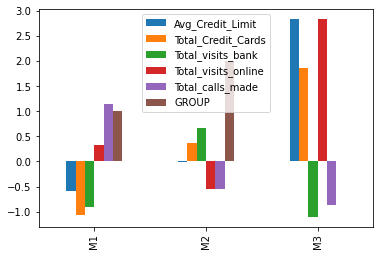

In [146]:
Kmeans_results.plot.bar()

<AxesSubplot:>

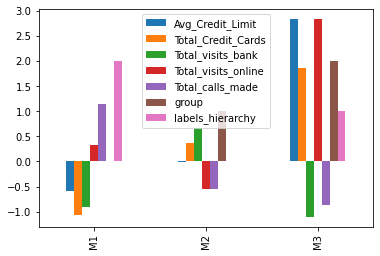

In [148]:
Hierarchical_results.plot.bar()

Since we have done both methods it is time to compare them


## Cluster Profiles and Marketing Recommendation

Since both the clustering alogrithms are giving similar clusters so we can assign labels from any one of the algorithm to the original (non scaled) data to analyse clusters profiles ( here we are assigning labels of Kmeans , same could be done using hierarchical labels)

In [151]:
KMeansData['KmeansLabel']=KMeansData['KmeansLabel']

In [163]:
dfsk.describe

<bound method NDFrame.describe of      Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0            1.740187           -1.249225          -0.860451   
1            0.410293           -0.787585          -1.473731   
2            0.410293            1.058973          -0.860451   
3           -0.121665            0.135694          -0.860451   
4            1.740187            0.597334          -1.473731   
..                ...                 ...                ...   
655          1.713589            2.443892          -0.860451   
656          1.314621            2.443892          -0.860451   
657          2.937092            1.520613          -0.860451   
658          3.655235            2.443892          -0.860451   
659          3.522245            1.982253          -1.473731   

     Total_visits_online  Total_calls_made  group  labels_hierarchy  
0              -0.547490         -1.251537      1                 0  
1               2.520519          1.891859      0        

## How many different segments of customers are there?

- There are a total numbers of segments 3

## Clusters Profiles

#### Label 0 can be considered low valued customers
This group comprises of about 34% of the customers ( 224/660 )

These customers have a mean "Avg_Credit_Limit " around 12200 and have 2 credit card on an average and the maximum number of credit card as 4.

They are the ones who makes the most number of customer care calls to the bank as the average calls made is 7 



#### Label 1 can be considered medium valued customers
This group forms the majority of the customers having about 58% customers in total  ( 386/660 )

These customers have  "Avg_Credit_Limit " ranging from 5000.0 to 100000.0 

These are the ones which make the maximum number of visits to the bank as the average visits to bank is 3.

They are the ones who are least active online as the maximum visit onine is just 3



#### Label 2 can be considered high value customers
These are the least in number i.e. only 50 customers comprising 7.5% of total customers (50/660) .

These customers have a minimum "Avg_Credit_Limit " of 84000 and have atleast 5 Credit cards .

These are the ones which make the minimum number of visits to the bank as the maximum visit to bank is 1 amongst all 50     customers.

They are mostly using online services as the average visit online is 11. 



## Business Recommendations
- Customers in the medium group (Label 1). They rarely participate in online activities, and one of the exercises may be to get them to participate online. If they register online, promotions and offers can be easily communicated to them.

- Customers in low group (label 0).It can also be classified to check whether there are extreme groups with higher average credit lines. These customers can get more discounts and new credit cards so that we can include them in the middle group (label 1 ) over a period of time. Similarly, we can do this for medium clients (label 1) and try to place them in the advanced group (label 2) over a period of time .

- Customers in low group (label 0). As the most frequent call center caller, you can try to deliver various offers to these customers and transition into a mid-sized group over a period of time.